In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

import matplotlib.pyplot as plt

from utils.dataset import train_test_load

from model.train.recommender import training_loop
from model.train.recommender_feature import training_loop as training_loop_feat

In [2]:
test_split = 0.2

train, test = train_test_load("../data/ml-latest-small/ratings.csv", "../data/ml-latest-small/movies.csv", test_split=test_split)

### Recommender

In [3]:
train_loss, train_rmse, test_loss, test_rmse, user_bias, movie_bias, user_embeddings, movie_embeddings = training_loop(
    train.user_movies, train.movie_users, test.user_movies, test.movie_users,
    embedding_dim = 10, r_lambda = 0.1, r_gamma = 0.1, r_tau = 0.1, n_iter = 50,
)

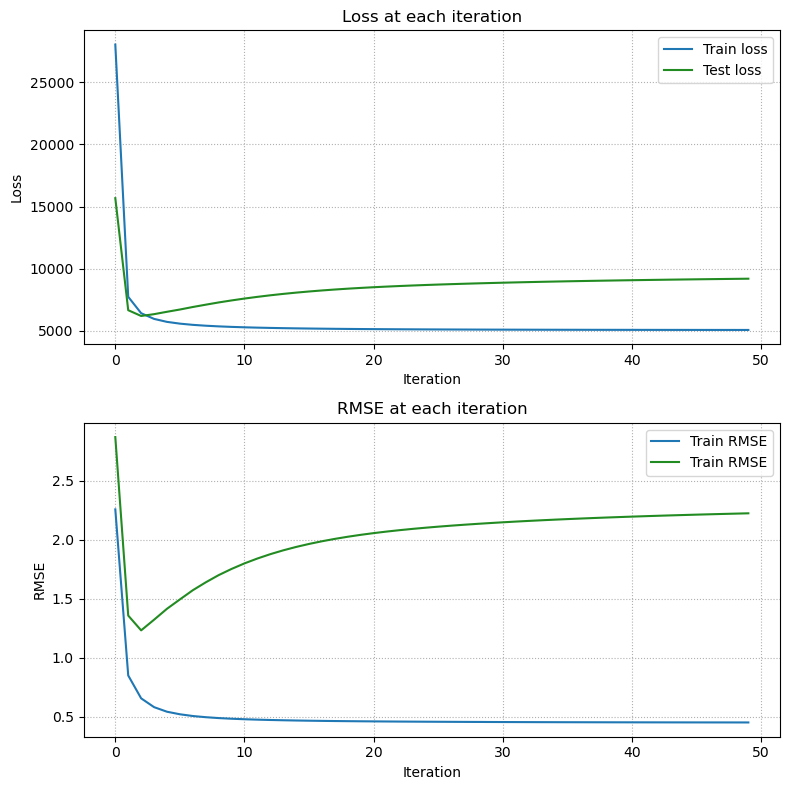

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(train_loss, label="Train loss")
axs[0].plot(test_loss, color="forestgreen", label="Test loss")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss at each iteration")
axs[0].grid(True, linestyle=":")
axs[0].legend()

axs[1].plot(train_rmse, label="Train RMSE")
axs[1].plot(test_rmse, color="forestgreen", label="Train RMSE")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("RMSE")
axs[1].set_title("RMSE at each iteration")
axs[1].grid(True, linestyle=":")
axs[1].legend()

plt.tight_layout()
# plt.savefig("../artifacts/plot/32m_small_training_with_embeddings_10.svg", format="svg")
plt.show()

In [5]:
train_loss, train_rmse, test_loss, test_rmse, user_bias, movie_bias, user_embeddings, movie_embeddings = training_loop(
    train.user_movies, train.movie_users, test.user_movies, test.movie_users,
    embedding_dim = 20, r_lambda = 0.1, r_gamma = 0.1, r_tau = 0.1, n_iter = 50,
)

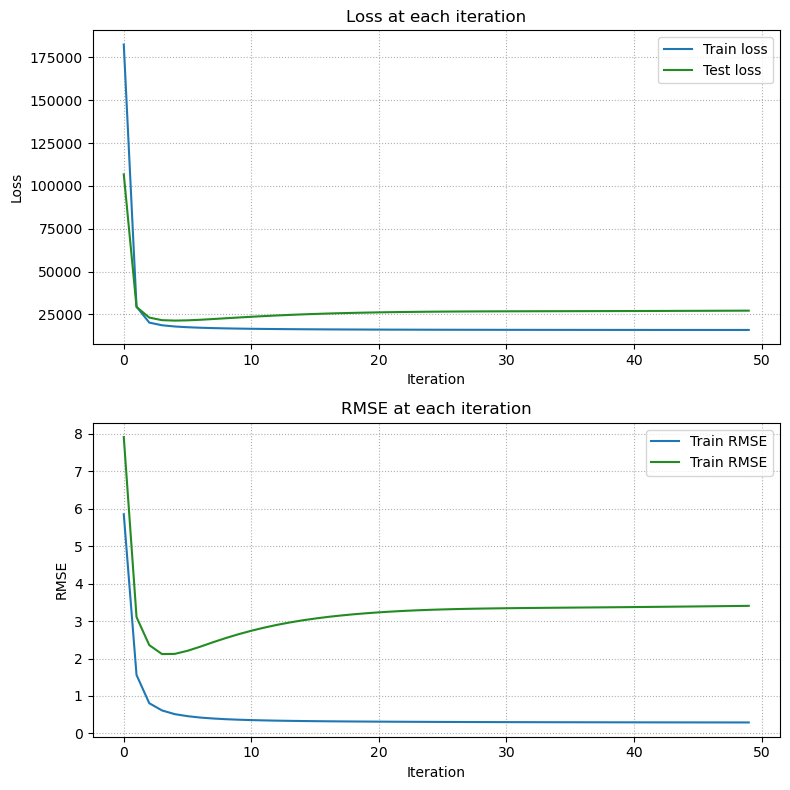

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(train_loss, label="Train loss")
axs[0].plot(test_loss, color="forestgreen", label="Test loss")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss at each iteration")
axs[0].grid(True, linestyle=":")
axs[0].legend()

axs[1].plot(train_rmse, label="Train RMSE")
axs[1].plot(test_rmse, color="forestgreen", label="Train RMSE")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("RMSE")
axs[1].set_title("RMSE at each iteration")
axs[1].grid(True, linestyle=":")
axs[1].legend()

plt.tight_layout()
# plt.savefig("../artifacts/plot/32m_small_training_with_embeddings_20.svg", format="svg")
plt.show()

### Recommender (with feature)

In [7]:
train_loss, train_rmse, test_loss, test_rmse, user_bias, movie_bias, user_embeddings, movie_embeddings, feat_embeddings = training_loop_feat(
    train.user_movies, train.movie_users, test.user_movies, test.movie_users, train.movie_feat, train.feat_movie,
    embedding_dim = 2, r_lambda = 0.1, r_gamma = 0.1, r_tau = 0.1, n_iter = 50,
)

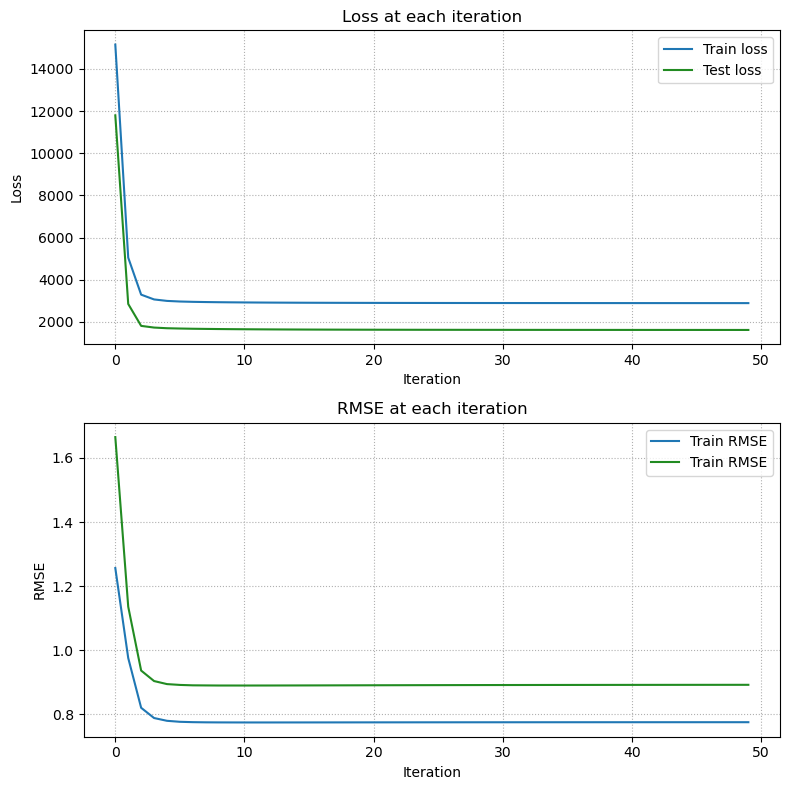

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(train_loss, label="Train loss")
axs[0].plot(test_loss, color="forestgreen", label="Test loss")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss at each iteration")
axs[0].grid(True, linestyle=":")
axs[0].legend()

axs[1].plot(train_rmse, label="Train RMSE")
axs[1].plot(test_rmse, color="forestgreen", label="Train RMSE")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("RMSE")
axs[1].set_title("RMSE at each iteration")
axs[1].grid(True, linestyle=":")
axs[1].legend()

plt.tight_layout()
# plt.savefig("../artifacts/plot/32m_small_training_with_features_2.svg", format="svg")
plt.show()

In [14]:
# import umap

# reducer = umap.UMAP()

# feat_projection = reducer.fit_transform(feat_embeddings)
feat_projection = feat_embeddings

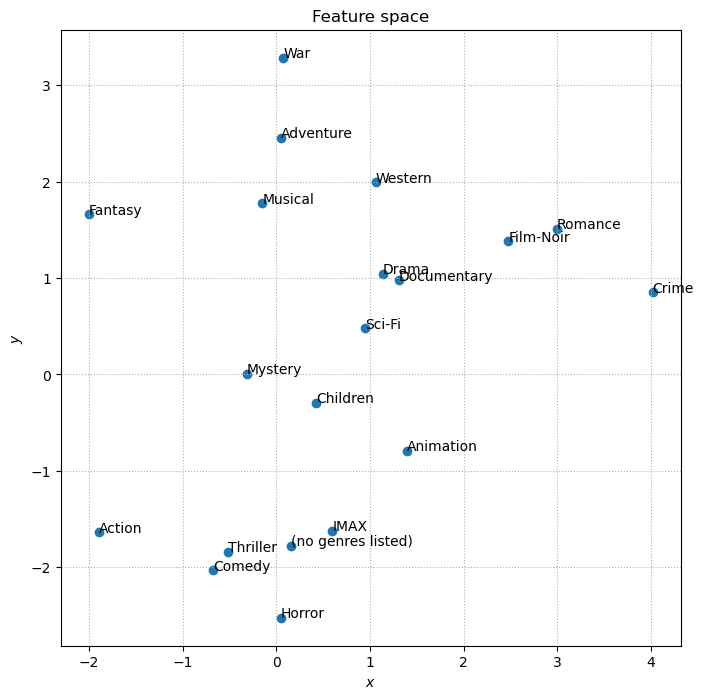

In [15]:
plt.subplots(figsize=(8, 8))

plt.scatter(feat_projection[:,0], feat_projection[:,1])

for i, x in enumerate(feat_projection):
    plt.annotate(train.idx_to_feat_id[i], x)

plt.title("Feature space")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True, linestyle=":")
# plt.savefig("../artifacts/plot/32m_small_feature_2_space_umap.svg", format="svg")
plt.show()

---